In [100]:
import os
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny, sobel
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


ImportError: cannot import name 'sobel'

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun  7 12:48:46 2019

@author: lauri
"""

import csv
img_path = "./not_cancer"
meta_file = "ISIC_y.csv"
list_of_meta = []
with open(meta_file, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        list_of_meta.append(row)    
#%%
list_mal_files = []
for line in list_of_meta:
    if line[1] == 'benign':
        list_mal_files.append(line[0] + ".jpg")
from shutil import copyfile
from os.path import join as oj



In [19]:
from skimage import feature

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
print("Number benign: {0:.2f}".format(len(list_mal_files)/len(list_of_meta)) )

Number benign: 0.81


In [22]:
from PIL import Image

In [23]:
typical_imgs = ["ISIC_0000694.jpg", 'ISIC_0002973.jpg','ISIC_0015171.jpg','ISIC_0005213.jpg']

In [24]:
imgs = [Image.open(oj(img_path, x)) for x in typical_imgs]

In [25]:
import numpy as np
imgs = [np.asarray(img) for img in imgs]

In [26]:
import scipy.ndimage as ndimage
from skimage.color import rgb2hsv

In [44]:
from skimage.morphology import opening, closing,dilation

In [48]:
from skimage.transform import hough_ellipse

In [27]:
rgb2hsv(test)[:,:,1].shape

(450, 600)

In [67]:
from skimage.filters import gaussian

array([146.21712593, 130.04006296, 119.33686296])

In [ ]:
test_diff.

In [101]:
from skimage.filters import sobel

0.013164628697993355

In [113]:
edges.mean()

0.0063436005437976254

In [119]:
from skimage.segmentation import  slic

In [125]:
slic(test).shape

(450, 600)

In [145]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat

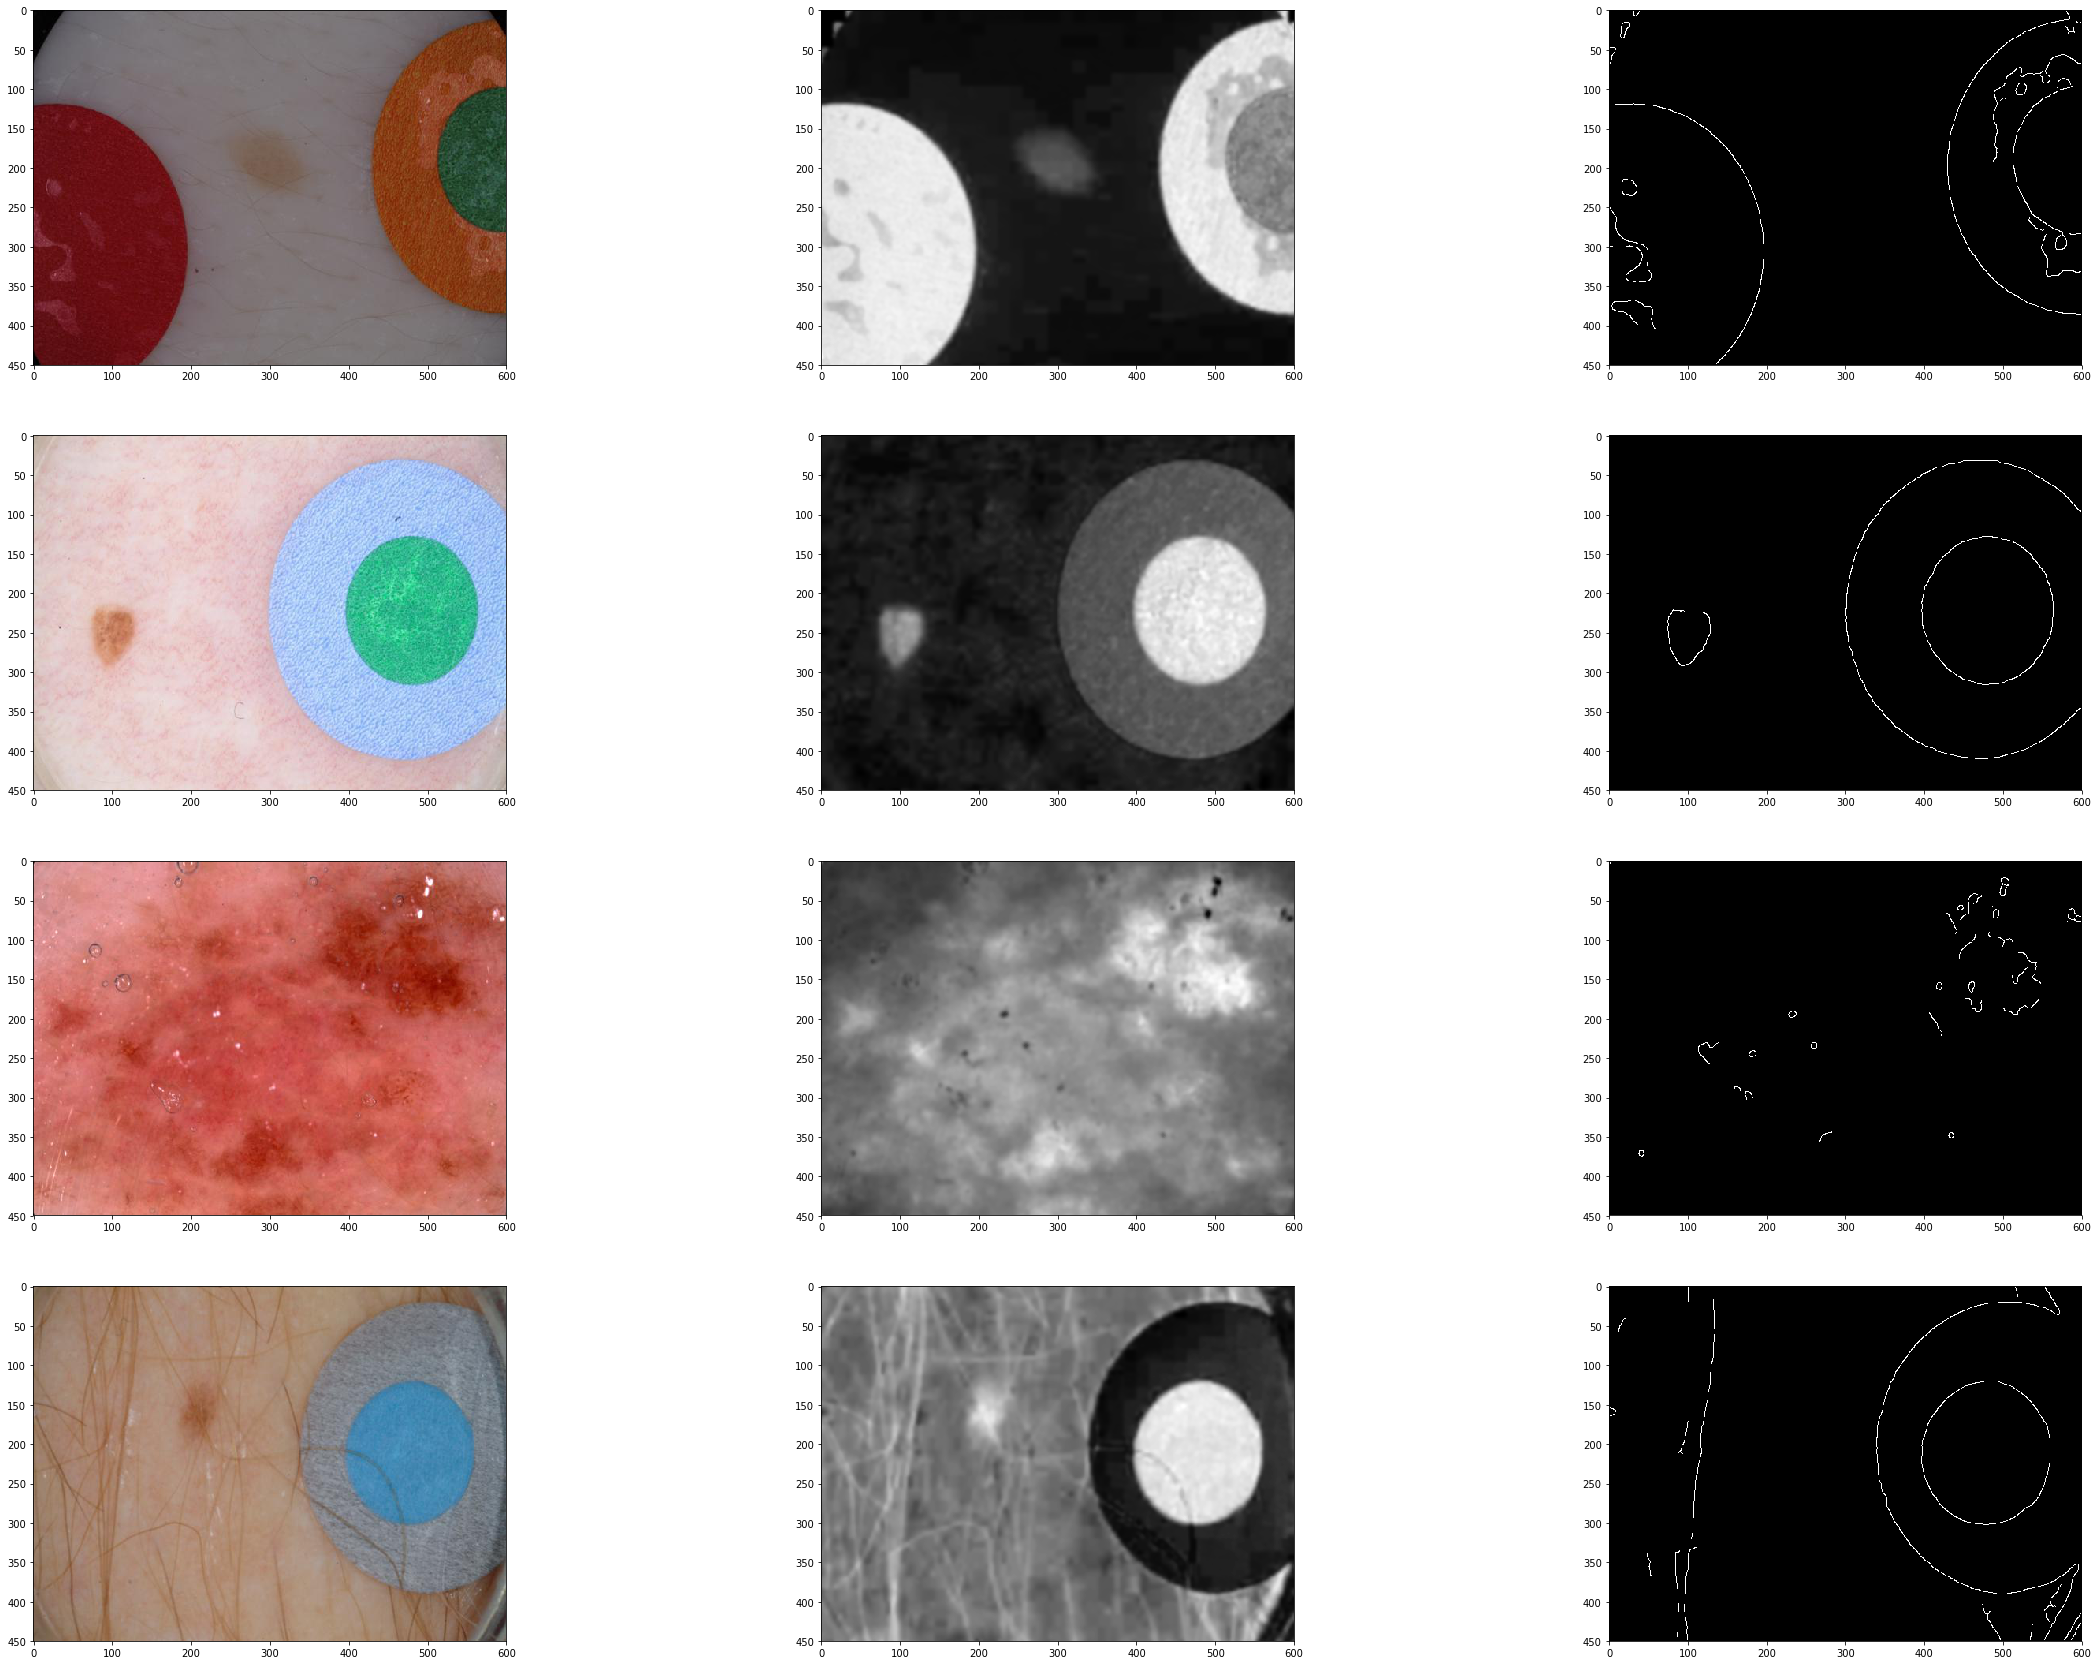

In [170]:
fig, axes = plt.subplots(nrows = len(imgs), ncols = 3, figsize=(40,30))
for i in range(len(imgs)):
    test = imgs[i]
    
    axes[i,0].imshow(test)

    h_img =rgb2hsv(test)[:,:,1]
    gauss = opening(closing(gaussian(h_img,sigma=2)))
   

    axes[i,1].imshow(gauss, cmap=plt.get_cmap('gray') )
    edges = canny(gauss, sigma= 1.5)

    axes[i,2].imshow(edges, cmap=plt.get_cmap('gray'))
fig.savefig("Tee")

In [322]:
data.coins().shape

(303, 384)

In [51]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0,
              low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators

In [52]:
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

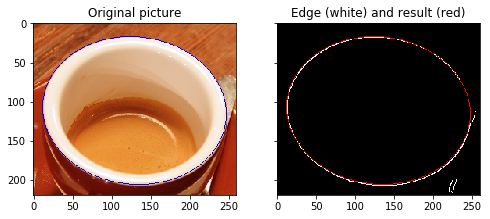

In [50]:
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()